Num GPUs Available: 1
Using GPU: PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.7058 - loss: 0.8190 - val_accuracy: 0.8615 - val_loss: 0.3982
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8645 - loss: 0.4068 - val_accuracy: 0.8837 - val_loss: 0.3490
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8835 - loss: 0.3535 - val_accuracy: 0.8802 - val_loss: 0.3510
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8941 - loss: 0.3249 - val_accuracy: 0.8960 - val_loss: 0.3170
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9033 - loss: 0.3062 - val_accuracy: 0.9007 - val_loss: 0.3149
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9085 - loss: 0.2914 - val_accuracy: 0.9004 - val_loss: 0.3139
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9117 - loss: 0.2810 - val_accuracy: 0.8972 - val_loss: 0.3175
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9193 - loss: 0.2674

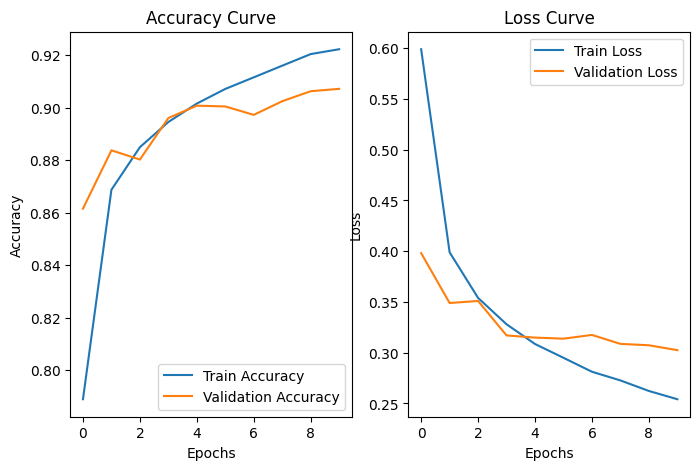

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


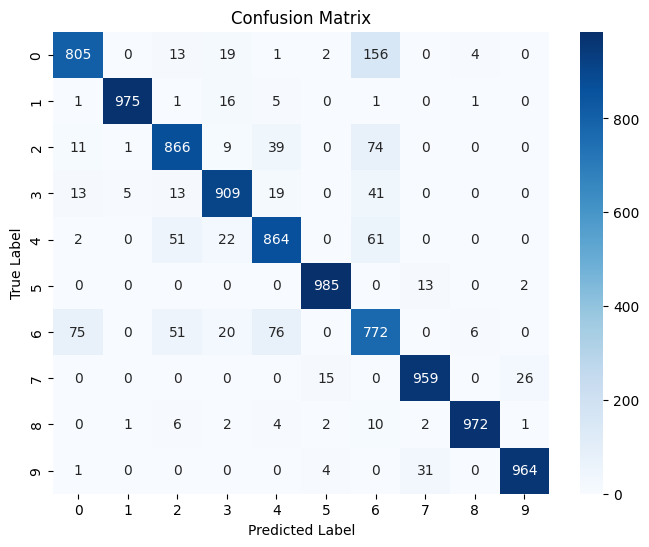

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
""" Batch size = 32 , filter size = (3,3),(5,5) , Optimiser algorithm = Adam , Regularisation = l2(0.0001)  """
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, regularizers
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
import os
from sklearn.metrics import confusion_matrix
from google.colab import files

# Check GPU availability
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))
if tf.config.list_physical_devices('GPU'):
    print("Using GPU:", tf.config.list_physical_devices('GPU')[0])
else:
    print("No GPU found, training on CPU.")

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

# Normalize the images to [0,1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data for CNN (Adding channel dimension)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Create directory to save plots
os.makedirs("plots", exist_ok=True)

# Force TensorFlow to use GPU if available
with tf.device('/GPU:0'):

    # Define CNN model with regularization
    model = keras.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', kernel_regularizer=regularizers.l2(0.0001), input_shape=(28,28,1)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (5,5), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001)),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])

    # Compile the model with Adam optimizer
    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# Evaluate the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training accuracy & testing accuracy
plt.figure(figsize=(8,5))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy Curve")
plt.savefig("plots/accuracy_curve11.png")  # Save the plot

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Loss Curve")
plt.savefig("plots/loss_curve11.png")  # Save the plot

plt.show()

y_pred = np.argmax(model.predict(x_test), axis=1)
cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig("plots/confusion_matrix11.png")  # Save plot
plt.show()

# Download Plots
files.download("plots/accuracy_curve11.png")
files.download("plots/loss_curve11.png")
files.download("plots/confusion_matrix11.png")